<a href="https://colab.research.google.com/github/saythegreat/Machine-Learning/blob/main/ML_LAB1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from scipy.spatial import distance

df = pd.read_csv("Combined_MalMem.csv")
df = df.drop(columns=["Filename"], errors='ignore')
df = df.loc[:, df.nunique() > 1]

if 'Class' not in df.columns:
    np.random.seed(42)
    df['Class'] = np.random.choice(['Spyware', 'Benign'], size=len(df))

df = df[df['Class'].isin(['Spyware', 'Benign'])]

X = df.drop(columns=['Class'])
y = df['Class']
y_numeric = y.astype('category').cat.codes


In [ ]:
spyware_mean = X[y == 'Spyware'].mean(axis=0)
benign_mean = X[y == 'Benign'].mean(axis=0)

spyware_std = X[y == 'Spyware'].std(axis=0)
benign_std = X[y == 'Benign'].std(axis=0)

interclass_distance = np.linalg.norm(spyware_mean - benign_mean)

print("Spyware Spread:\n", spyware_std)
print("\nBenign Spread:\n", benign_std)
print("\nInterclass Distance:", interclass_distance)


Spyware Spread:
 pslist.nproc                                 7.839263
pslist.nppid                                 3.494419
pslist.avg_threads                           2.384983
pslist.avg_handlers                         27.132259
dlllist.ndlls                              253.864164
dlllist.avg_dlls_per_proc                    3.075121
handles.nhandles                          1317.224614
handles.avg_handles_per_proc                26.114655
handles.nfile                              141.150149
handles.nevent                             530.807427
handles.ndesktop                             8.112339
handles.nkey                               141.133793
handles.nthread                             87.912895
handles.ndirectory                          15.994855
handles.nsemaphore                         104.115053
handles.ntimer                              14.508827
handles.nsection                            43.421094
handles.nmutant                             34.738962
ldrmodules.

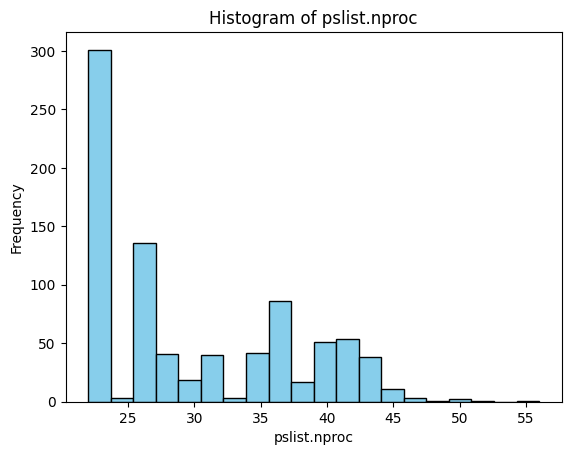

Mean of pslist.nproc: 30.023529411764706
Variance of pslist.nproc: 60.47003460207635


In [ ]:
feature_name = X.columns[0]
feature_data = X[feature_name]

plt.hist(feature_data, bins=20, color='skyblue', edgecolor='black')
plt.title(f'Histogram of {feature_name}')
plt.xlabel(feature_name)
plt.ylabel('Frequency')
plt.show()

print(f"Mean of {feature_name}: {np.mean(feature_data)}")
print(f"Variance of {feature_name}: {np.var(feature_data)}")


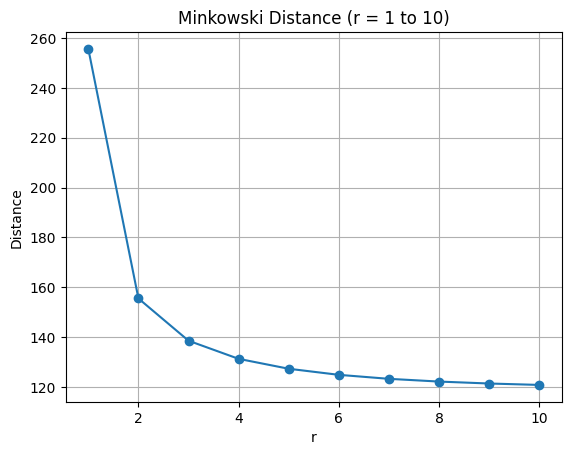

In [ ]:
vec1 = X.iloc[0]
vec2 = X.iloc[1]

distances = []
r_values = list(range(1, 11))

for r in r_values:
    d = distance.minkowski(vec1, vec2, r)
    distances.append(d)

plt.plot(r_values, distances, marker='o')
plt.title("Minkowski Distance (r = 1 to 10)")
plt.xlabel("r")
plt.ylabel("Distance")
plt.grid(True)
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y_numeric, test_size=0.3, random_state=42)

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=3)

In [ ]:
accuracy = knn.score(X_test, y_test)
print(f"Test Accuracy (k=3): {accuracy:.2f}")

Test Accuracy (k=3): 0.48


In [ ]:
predictions = knn.predict(X_test)
print("Predictions:\n", predictions)

single_prediction = knn.predict([X_test.iloc[0]])
print(f"\nPrediction for first test vector: {single_prediction}")

Predictions:
 [0 0 1 0 1 0 1 1 0 0 1 0 1 1 1 0 1 1 1 1 0 1 0 0 1 0 1 0 1 1 1 0 1 1 1 1 0
 0 1 0 0 0 0 0 1 0 0 0 0 1 1 1 1 1 0 1 1 0 0 1 0 1 1 1 0 1 1 0 1 0 1 0 1 0
 1 0 1 0 0 0 0 1 1 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 1 0 0 1 1 1 0 0 1 1 1 1 0
 0 1 0 0 0 0 0 0 1 1 1 1 1 1 1 0 1 0 0 1 0 0 0 1 1 0 1 0 1 0 0 0 0 1 0 1 1
 0 1 1 1 0 0 0 0 1 1 0 0 0 0 0 1 1 0 0 0 0 1 0 0 1 0 0 1 0 1 1 0 1 0 0 0 0
 0 1 0 0 0 0 0 0 1 0 1 0 0 1 1 0 1 1 1 1 0 0 1 1 0 0 0 0 1 1 0 0 1 0 0 0 0
 1 1 0 0 1 1 1 1 0 0 0 0 0 1 0 1 0 0 1 1 0 1 1 1 0 1 0 1 0 0 1 0 1]

Prediction for first test vector: [0]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


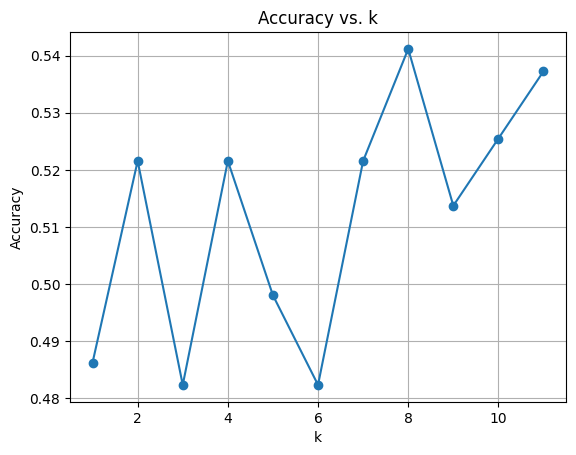

In [ ]:
accuracies = []
k_values = range(1, 12)

for k in k_values:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    acc = model.score(X_test, y_test)
    accuracies.append(acc)

plt.plot(k_values, accuracies, marker='o')
plt.title("Accuracy vs. k")
plt.xlabel("k")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()


In [ ]:
y_pred = knn.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

print("\nClassification Report:\n", classification_report(y_test, y_pred))

train_acc = knn.score(X_train, y_train)
test_acc = knn.score(X_test, y_test)

print(f"Train Accuracy: {train_acc:.2f}")
print(f"Test Accuracy: {test_acc:.2f}")

if train_acc > test_acc + 0.1:
    print("Model is likely Overfitting")
elif abs(train_acc - test_acc) < 0.05:
    print("Model is likely Regularfitting")
else:
    print("Model may be Underfitting")


Confusion Matrix:
 [[69 63]
 [69 54]]

Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.52      0.51       132
           1       0.46      0.44      0.45       123

    accuracy                           0.48       255
   macro avg       0.48      0.48      0.48       255
weighted avg       0.48      0.48      0.48       255

Train Accuracy: 0.78
Test Accuracy: 0.48
Model is likely Overfitting
